In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle
import plotly.express as px

***holiday_event.csv***


In [ ]:
#holidays_events table
holiday_events = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_holidayes_events.csv",parse_dates=['date'])
holiday_events

,date,type,locale,locale_name,transferred
0,2015-01-01,Holiday,National,4,0
1,2015-01-02,Bridge,National,4,0
2,2015-01-10,Work Day,National,4,0
3,2015-02-16,Holiday,National,4,0
4,2015-02-17,Holiday,National,4,0
...,...,...,...,...,...
185,2017-12-22,Additional,National,4,0
186,2017-12-23,Additional,National,4,0
187,2017-12-24,Additional,National,4,0
188,2017-12-25,Holiday,National,4,0


In [ ]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         190 non-null    datetime64[ns]
 1   type         190 non-null    object        
 2   locale       190 non-null    object        
 3   locale_name  190 non-null    int64         
 4   transferred  190 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.6+ KB


In [ ]:
holiday_events.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name             int64
transferred             int64
dtype: object

In [ ]:
print(holiday_events["type"].value_counts())

type
Holiday       114
Event          37
Additional     26
Transfer        9
Bridge          2
Work Day        2
Name: count, dtype: int64


In [ ]:
print(holiday_events["locale"].unique())

['National' 'Local' 'Regional']


**Train.csv**


In [ ]:
train=pd.read_parquet("C:/Users/Nada/Downloads/train_reduced.parquet")
train['date']=pd.to_datetime(train['date'] , format= '%Y-%m-%d')
train.head(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2015-01-01,25,103665,12.000,0
1,2015-01-01,25,105575,23.000,0
2,2015-01-01,25,108634,1.000,0
3,2015-01-01,25,108698,6.000,0
4,2015-01-01,25,108786,6.000,0
5,2015-01-01,25,108831,4.538,0
6,2015-01-01,25,108862,3.000,0
7,2015-01-01,25,108952,5.000,0
8,2015-01-01,25,111397,6.000,0
9,2015-01-01,25,112830,1.000,0


In [ ]:
train.shape

(86897278, 5)

In [ ]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86897278 entries, 0 to 86897277
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int16         
 2   item_nbr     int32         
 3   unit_sales   float32       
 4   onpromotion  int8          
 5   year         int32         
 6   month        int32         
dtypes: datetime64[ns](1), float32(1), int16(1), int32(3), int8(1)
memory usage: 2.2 GB


**Items.csv**

In [ ]:
items = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_items.csv")
items

,item_nbr,family,class,perishable,class_perishable_interaction
0,96995,GROCERY I,1093,0,0
1,99197,GROCERY I,1067,0,0
2,103501,CLEANING,3008,0,0
3,103520,GROCERY I,1028,0,0
4,103665,BREAD/BAKERY,2712,1,2712
...,...,...,...,...,...
4095,2132318,GROCERY I,1002,0,0
4096,2132945,GROCERY I,1026,0,0
4097,2132957,GROCERY I,1068,0,0
4098,2134058,BEVERAGES,1124,0,0


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   item_nbr                      4100 non-null   int64 
 1   family                        4100 non-null   object
 2   class                         4100 non-null   int64 
 3   perishable                    4100 non-null   int64 
 4   class_perishable_interaction  4100 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 160.3+ KB


In [ ]:
items.describe()

,item_nbr,class,perishable,class_perishable_interaction
count,4.100000e+03,4100.0000,4100.000000,4100.000000
mean,1.251436e+06,2169.6500,0.240488,553.056341
std,5.876872e+05,1484.9109,0.427432,993.041232
min,9.699500e+04,1002.0000,0.000000,0.000000
25%,8.181108e+05,1068.0000,0.000000,0.000000
50%,1.306198e+06,2004.0000,0.000000,0.000000
75%,1.904918e+06,2990.5000,0.000000,0.000000
max,2.134244e+06,7780.0000,1.000000,2986.000000


In [ ]:
print(items.columns)

Index(['item_nbr', 'family', 'class', 'perishable',
       'class_perishable_interaction'],
      dtype='object')


In [ ]:
items.shape

(4100, 5)

In [ ]:
items.isnull().sum()

item_nbr                        0
family                          0
class                           0
perishable                      0
class_perishable_interaction    0
dtype: int64

**oil.csv**

In [ ]:
oil = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_oil.csv")
oil.head()

,date,dcoilwtico,oil_ma7,oil_price_change
0,2015-01-02,52.72,0.0,0.000000
1,2015-01-05,50.05,0.0,-0.050645
2,2015-01-06,47.98,0.0,-0.041359
3,2015-01-07,48.69,0.0,0.014798
4,2015-01-08,48.80,0.0,0.002259


In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              695 non-null    object 
 1   dcoilwtico        695 non-null    float64
 2   oil_ma7           695 non-null    float64
 3   oil_price_change  695 non-null    float64
dtypes: float64(3), object(1)
memory usage: 21.8+ KB


In [ ]:
oil.describe()

,dcoilwtico,oil_ma7,oil_price_change
count,695.000000,695.000000,695.000000
mean,46.765856,46.420092,0.000203
std,6.682662,7.669895,0.026963
min,26.190000,0.000000,-0.086538
25%,44.070000,44.355000,-0.014982
50%,47.260000,47.244286,0.000000
75%,50.600000,50.489286,0.014778
max,61.360000,60.271429,0.119511


**stores.csv**

In [ ]:
stores = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_stores.csv")
stores.head()


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
stores.shape

(54, 5)

In [ ]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [ ]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

**Test.csv**

In [ ]:
test = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_test.csv",parse_dates=['date'])
test.head()

,date,store_nbr,item_nbr,onpromotion
0,2017-08-16,1,96995,0
1,2017-08-16,1,99197,0
2,2017-08-16,1,103501,0
3,2017-08-16,1,103520,0
4,2017-08-16,1,103665,0


In [ ]:
test.dtypes

date           datetime64[ns]
store_nbr               int64
item_nbr                int64
onpromotion             int64
dtype: object

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   onpromotion  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 102.9 MB


In [ ]:
test.shape

(3370464, 4)

**Transaction.csv**

In [ ]:
transactions = pd.read_csv("C:/Users/Nada/Desktop/Cleaned_Data/cleaned_transaction.csv",parse_dates=['date'])

transactions.head()

,date,store_nbr,transactions,avg_transaction_per_store
0,2015-01-01,25,7.697575,6.809129
1,2015-01-02,1,6.929517,7.235730
2,2015-01-02,2,7.528332,7.547012
3,2015-01-02,3,8.140316,8.068792
4,2015-01-02,4,7.327781,7.288880


In [ ]:
print(transactions.shape)

(49442, 4)


In [ ]:
transactions.describe()

,date,store_nbr,transactions,avg_transaction_per_store
count,49442,49442.000000,49442.000000,49442.000000
mean,2016-05-01 01:02:58.099591424,27.130577,7.280405,7.280405
min,2015-01-01 00:00:00,1.000000,1.791759,6.299658
25%,2015-09-08 00:00:00,14.000000,6.933423,6.991317
50%,2016-05-03 00:00:00,27.000000,7.226936,7.235730
75%,2016-12-27 00:00:00,40.000000,7.607381,7.609636
max,2017-08-15 00:00:00,54.000000,9.031214,8.370767
std,NaN,15.493903,0.517734,0.484988


In [ ]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
#transactions['day_of_week'] = transactions['date'].dt.dayofweek


In [ ]:
transactions.head()

,date,store_nbr,transactions,avg_transaction_per_store,year,month,day
0,2015-01-01,25,7.697575,6.809129,2015,1,1
1,2015-01-02,1,6.929517,7.235730,2015,1,2
2,2015-01-02,2,7.528332,7.547012,2015,1,2
3,2015-01-02,3,8.140316,8.068792,2015,1,2
4,2015-01-02,4,7.327781,7.288880,2015,1,2


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49442 entries, 0 to 49441
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       49442 non-null  datetime64[ns]
 1   store_nbr                  49442 non-null  int64         
 2   transactions               49442 non-null  float64       
 3   avg_transaction_per_store  49442 non-null  float64       
 4   year                       49442 non-null  int32         
 5   month                      49442 non-null  int32         
 6   day                        49442 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 2.1 MB


In [ ]:
transactions.describe()

,date,store_nbr,transactions,avg_transaction_per_store,year,month,day
count,49442,49442.000000,49442.000000,49442.000000,49442.000000,49442.000000,49442.000000
mean,2016-05-01 01:02:58.099591424,27.130577,7.280405,7.280405,2015.873609,6.023603,15.658185
min,2015-01-01 00:00:00,1.000000,1.791759,6.299658,2015.000000,1.000000,1.000000
25%,2015-09-08 00:00:00,14.000000,6.933423,6.991317,2015.000000,3.000000,8.000000
50%,2016-05-03 00:00:00,27.000000,7.226936,7.235730,2016.000000,6.000000,16.000000
75%,2016-12-27 00:00:00,40.000000,7.607381,7.609636,2016.000000,9.000000,23.000000
max,2017-08-15 00:00:00,54.000000,9.031214,8.370767,2017.000000,12.000000,31.000000
std,NaN,15.493903,0.517734,0.484988,0.774448,3.314107,8.762620


**Visualizatio**

In [ ]:
def get_different_categories(df,categorical_attribute):
    temp=df[categorical_attribute].value_counts()
    print(temp)
    temp.plot.bar(color='skyblue')
    plt.ylabel("count")
    sns.despine()


type
Holiday       114
Event          37
Additional     26
Transfer        9
Bridge          2
Work Day        2
Name: count, dtype: int64


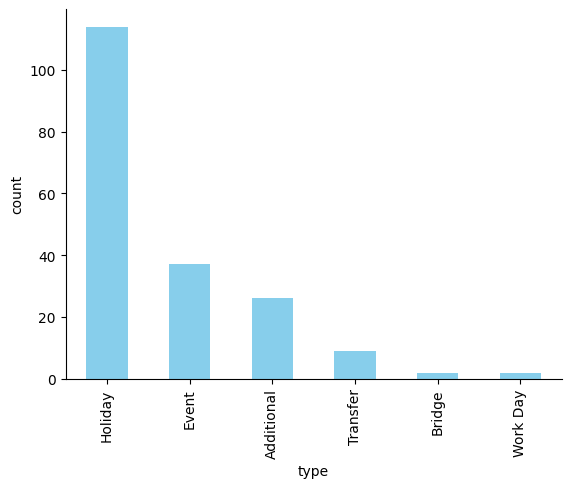

In [ ]:
#count the holiday_event typre
get_different_categories(holiday_events,'type')

locale
National    99
Local       79
Regional    12
Name: count, dtype: int64


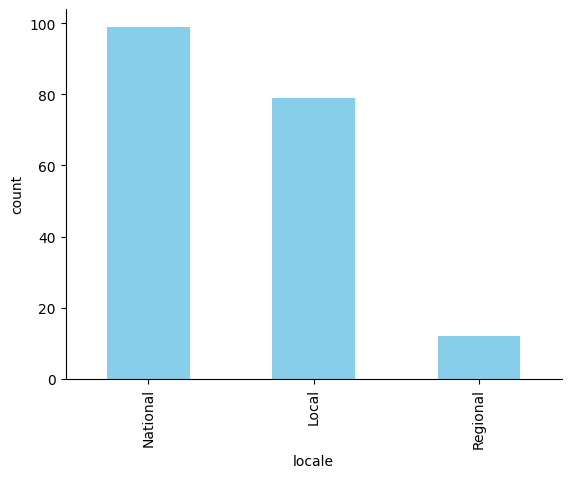

In [ ]:
#count the holiday_event locale
get_different_categories(holiday_events,'locale')

transferred
0    181
1      9
Name: count, dtype: int64


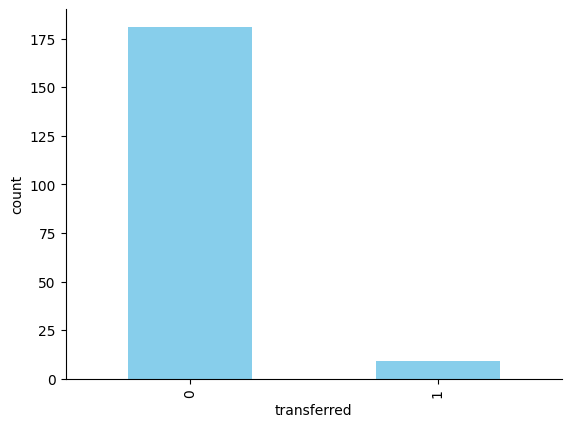

In [ ]:
get_different_categories(holiday_events,'transferred')

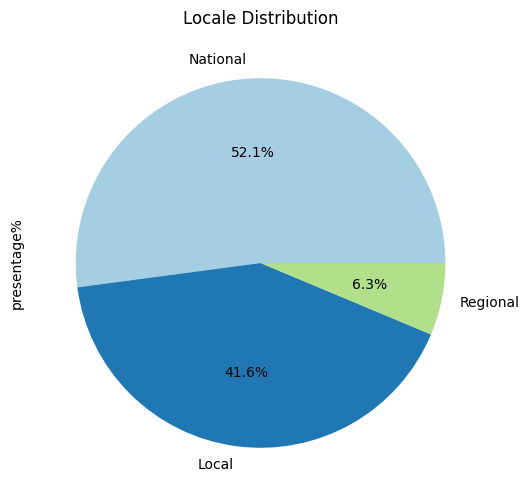

In [ ]:
#locale distribution
locale_count = holiday_events['locale'].value_counts()
plt.figure(figsize=(10,6))
locale_count.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Locale Distribution', color='black')
plt.ylabel('presentage%')
plt.show()


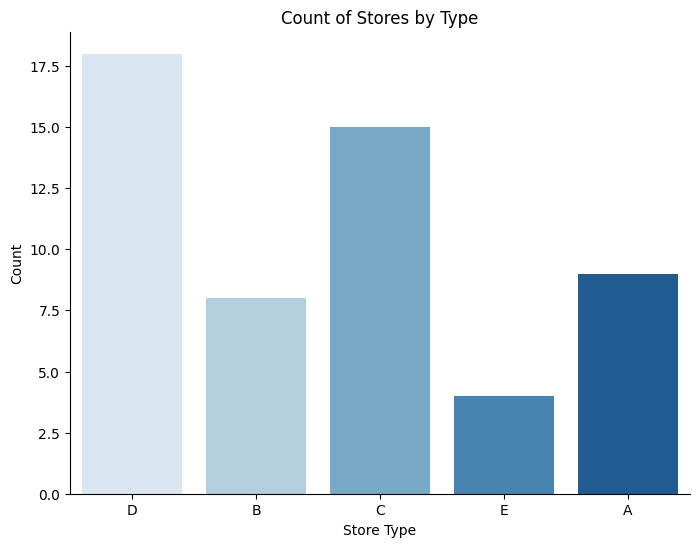

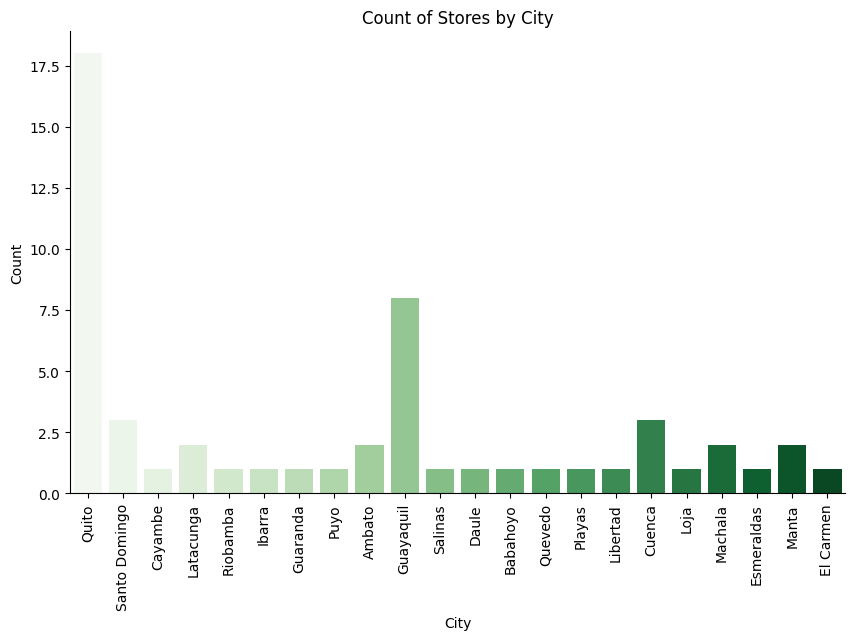

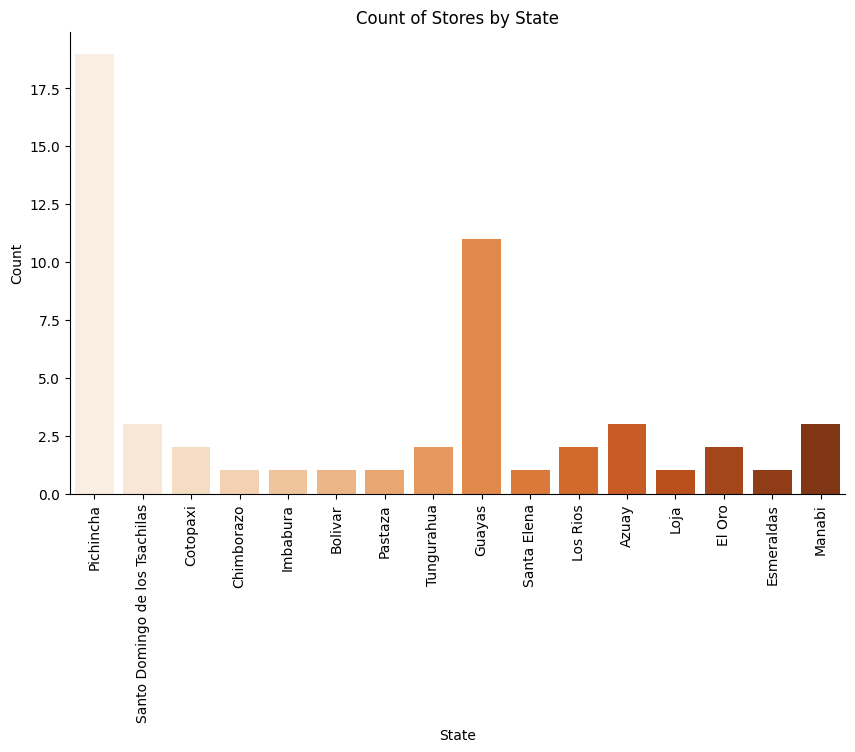

In [ ]:
###count the NO.of stores by type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='type', data=stores, palette='Blues', legend=False)
plt.title('Count of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
sns.despine()
plt.show()

####count the NO.of stores by city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='city', data=stores, palette='Greens', legend=False)
plt.xticks(rotation=90)
plt.title('Count of Stores by City')
plt.xlabel('City')
plt.ylabel('Count')
sns.despine()
plt.show()

####count the NO.of stores by state
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=stores, palette='Oranges', legend=False)
plt.xticks(rotation=90)
plt.title('Count of Stores by State')
plt.xlabel('State')
plt.ylabel('Count')
sns.despine()
plt.show()

In [ ]:

city_store_count = stores.groupby(['state', 'city'])['store_nbr'].nunique().reset_index()
city_store_count.rename(columns={'store_nbr': 'Number_of_Stores'}, inplace=True)
print(city_store_count)


                             state           city  Number_of_Stores
0                            Azuay         Cuenca                 3
1                          Bolivar       Guaranda                 1
2                       Chimborazo       Riobamba                 1
3                         Cotopaxi      Latacunga                 2
4                           El Oro        Machala                 2
5                       Esmeraldas     Esmeraldas                 1
6                           Guayas          Daule                 1
7                           Guayas      Guayaquil                 8
8                           Guayas       Libertad                 1
9                           Guayas         Playas                 1
10                        Imbabura         Ibarra                 1
11                            Loja           Loja                 1
12                        Los Rios       Babahoyo                 1
13                        Los Rios        Queved

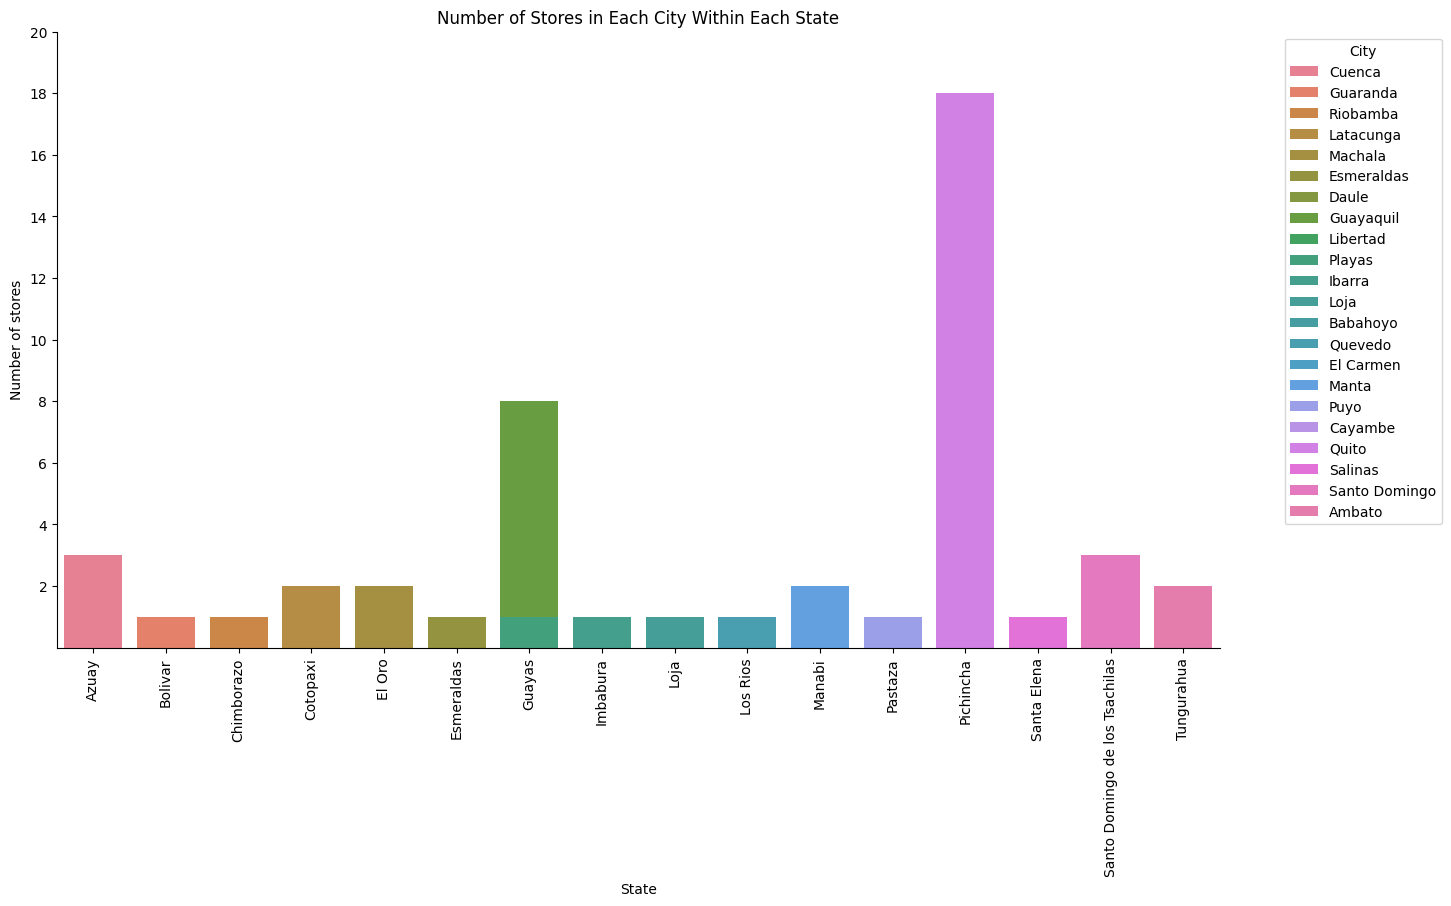

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=city_store_count, x='state', y='Number_of_Stores', hue='city', dodge=False)
plt.xticks(rotation=90)
plt.title("Number of Stores in Each City Within Each State")
plt.xlabel("State")
plt.ylabel("Number of stores")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
y_ticks = np.linspace(2, 20, num=10)
plt.yticks(y_ticks)
sns.despine()
plt.show()

In [ ]:
transaction_store=pd.merge(stores,transactions,on='store_nbr',how='inner')
transaction_store

,store_nbr,city,state,type,cluster,date,transactions,avg_transaction_per_store,year,month,day
0,1,Quito,Pichincha,D,13,2015-01-02,6.929517,7.235730,2015,1,2
1,1,Quito,Pichincha,D,13,2015-01-03,6.923629,7.235730,2015,1,3
2,1,Quito,Pichincha,D,13,2015-01-04,6.184149,7.235730,2015,1,4
3,1,Quito,Pichincha,D,13,2015-01-05,7.579168,7.235730,2015,1,5
4,1,Quito,Pichincha,D,13,2015-01-06,7.544861,7.235730,2015,1,6
...,...,...,...,...,...,...,...,...,...,...,...
49437,54,El Carmen,Manabi,C,3,2017-08-11,6.645091,6.737935,2017,8,11
49438,54,El Carmen,Manabi,C,3,2017-08-12,6.806829,6.737935,2017,8,12
49439,54,El Carmen,Manabi,C,3,2017-08-13,6.961296,6.737935,2017,8,13
49440,54,El Carmen,Manabi,C,3,2017-08-14,6.708084,6.737935,2017,8,14


<function matplotlib.pyplot.show(close=None, block=None)>

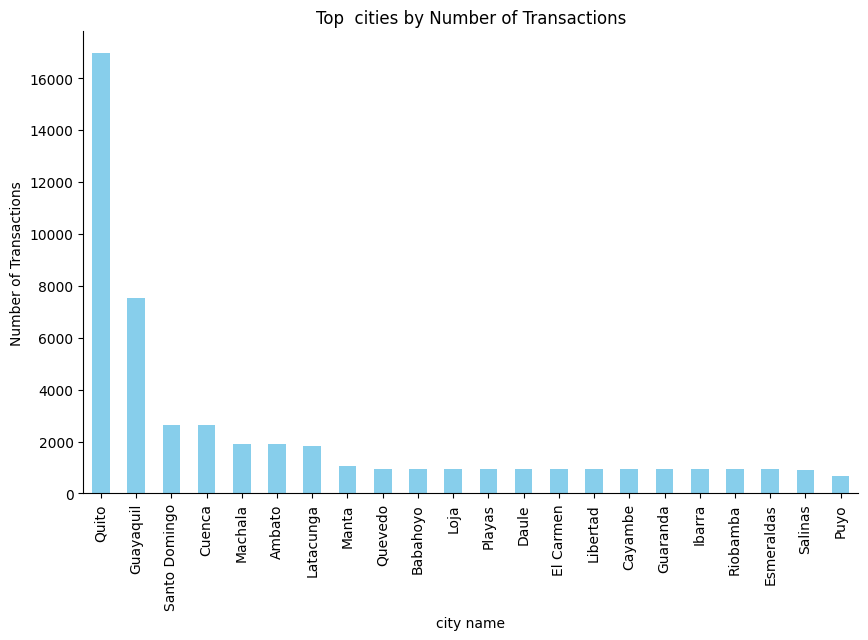

In [ ]:
#top city by number of transactions
No_OF_transaction_per_city=transaction_store.groupby('city')['transactions'].count().sort_values(ascending=False)
top_cities=No_OF_transaction_per_city
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar',color='skyblue')
plt.title('Top  cities by Number of Transactions',color='black')
plt.xlabel('city name',color='black')
plt.ylabel('Number of Transactions',color='black')
sns.despine()
plt.xticks(rotation=90)
plt.show

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
LINGERIE                        20
AUTOMOTIVE                      20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

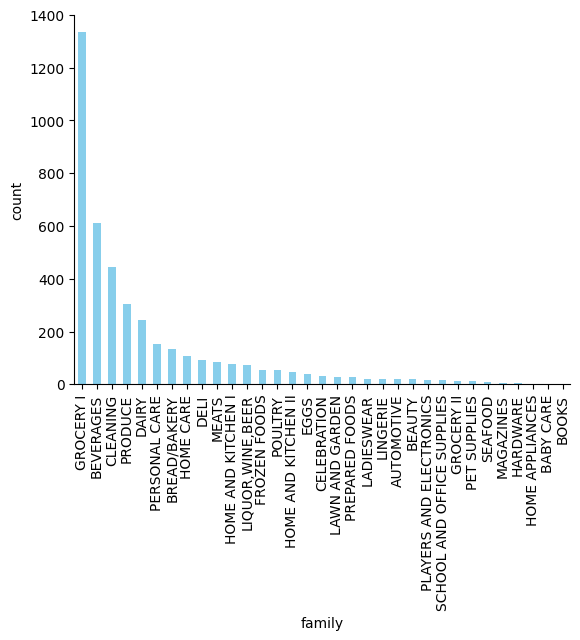

In [ ]:
#count the No.of items in each category
get_different_categories(items,'family')


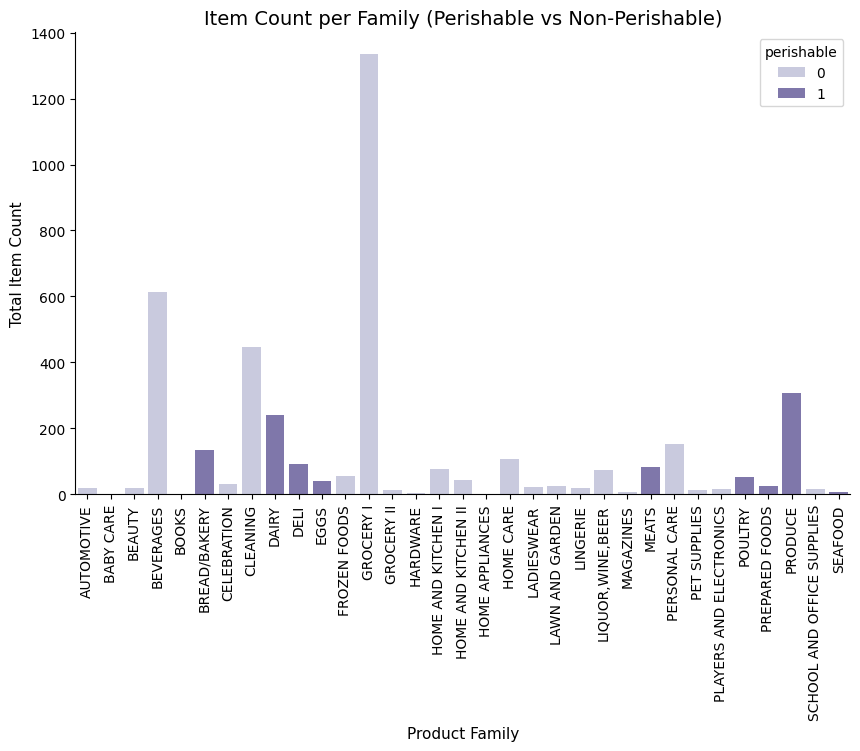

In [ ]:
item_counts = items.groupby(['family', 'perishable'])['item_nbr'].count().reset_index(name='count')

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(data=item_counts, x='family', y='count', hue='perishable',palette='Purples')

# Customize the plot
plt.title('Item Count per Family (Perishable vs Non-Perishable)', fontsize=14, color='black')
plt.xlabel('Product Family', fontsize=11)
plt.ylabel('Total Item Count', fontsize=11)

plt.xticks(rotation=90)
sns.despine()
plt.show()

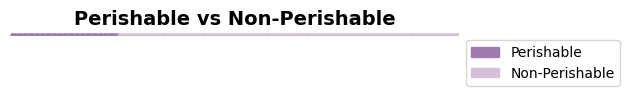

In [ ]:
# Count perishable and non-perishable items
perishable_count = items[items['perishable'] == 1].shape[0]
non_perishable_count = items[items['perishable'] == 0].shape[0]

# Data for the Waffle Chart
data = {
    'Perishable': perishable_count,
    'Non-Perishable': non_perishable_count
}

# Create Waffle Chart with simple colors
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    title={'label': 'Perishable vs Non-Perishable', 'loc': 'center', 'fontsize': 14, 'fontweight': 'bold'},
    colors=['#9D7BB0', '#D8BFD8'],  # Simple colors
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Show plot
plt.show()


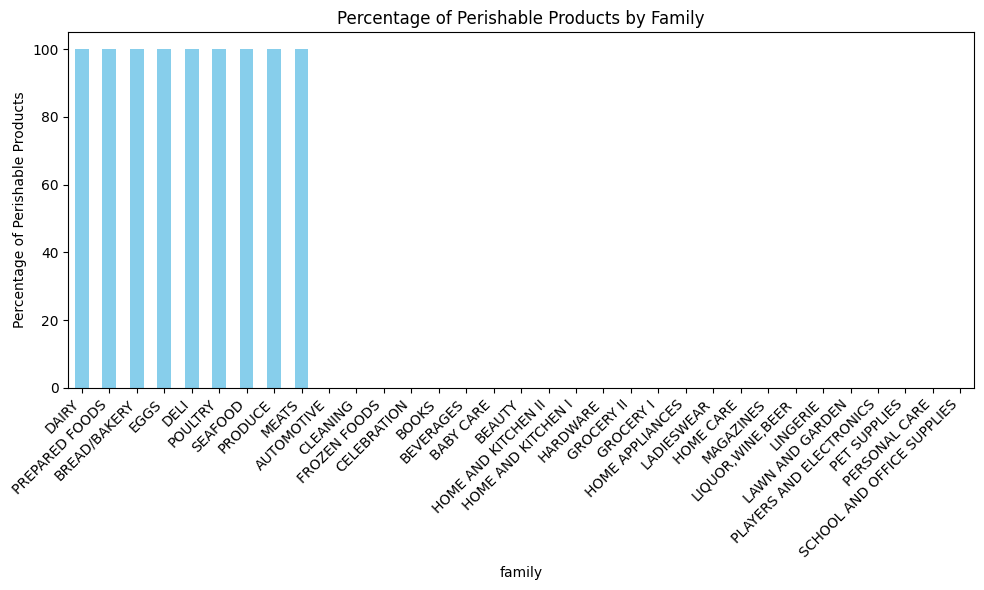

In [ ]:
#caculate the percentage of perishable products by family
family_perishable = items.groupby('family')['perishable'].mean() * 100

plt.figure(figsize=(10, 6))
family_perishable.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Percentage of Perishable Products by Family')
plt.xlabel('family')
plt.ylabel('Percentage of Perishable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

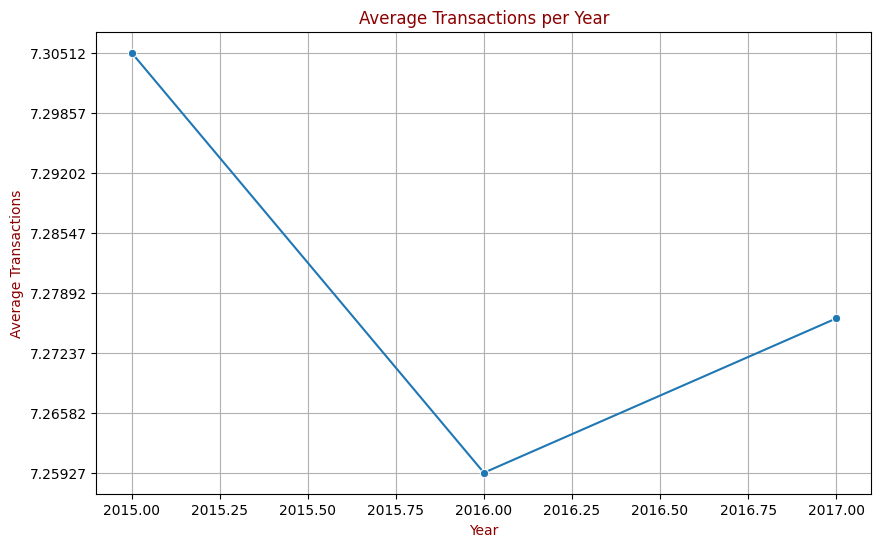

In [ ]:
#calculate the Avarage transactions per year
transactions_per_year = transactions.groupby('year')['transactions'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=transactions_per_year['year'], y=transactions_per_year['transactions'], marker='o')

plt.xlabel("Year", color='darkred')
plt.ylabel("Average Transactions", color='darkred')
plt.title("Average Transactions per Year", color='darkred')
plt.xticks(rotation=0)
plt.grid(True)

# Dynamically set y-axis ticks
y_ticks = np.linspace(transactions_per_year['transactions'].min(), transactions_per_year['transactions'].max(), num=8)
plt.yticks(y_ticks)

plt.show()

    month  transactions
0       1      7.271011
1       2      7.279388
2       3      7.275890
3       4      7.291490
4       5      7.294091
5       6      7.266336
6       7      7.269287
7       8      7.264748
8       9      7.251822
9      10      7.238868
10     11      7.238535
11     12      7.433909


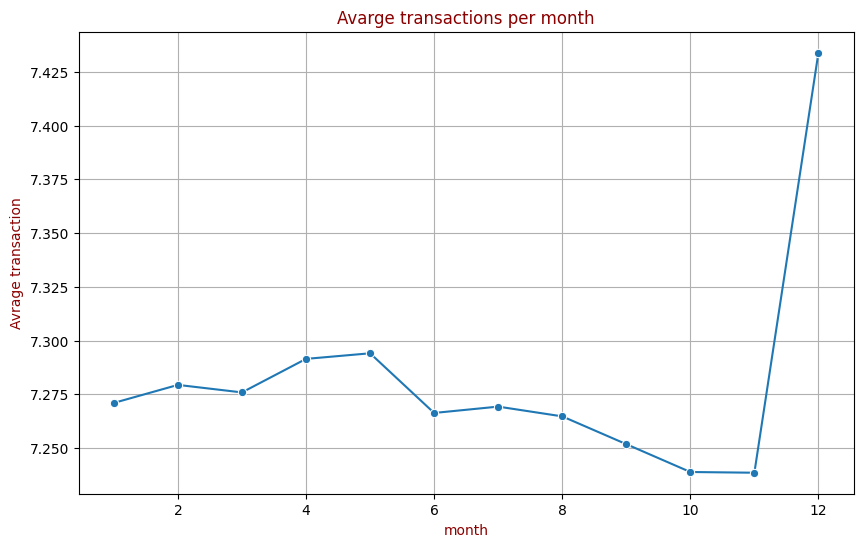

In [ ]:
# caculate the avarage transaction per month
transactions_per_month=transactions.groupby('month')['transactions'].mean().reset_index()
print(transactions_per_month)
plt.figure(figsize=(10, 6))

sns.lineplot(x=transactions_per_month['month'], y=transactions_per_month['transactions'], marker='o')

plt.xlabel("month",color='darkred')
plt.ylabel("Avrage transaction",color='darkred')
plt.title("Avarge transactions per month",color='darkred')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()


In [ ]:
transactions.head()

,date,store_nbr,transactions,avg_transaction_per_store,year,month,day
0,2015-01-01,25,7.697575,6.809129,2015,1,1
1,2015-01-02,1,6.929517,7.235730,2015,1,2
2,2015-01-02,2,7.528332,7.547012,2015,1,2
3,2015-01-02,3,8.140316,8.068792,2015,1,2
4,2015-01-02,4,7.327781,7.288880,2015,1,2


In [ ]:
holiday_events.head()

,date,type,locale,locale_name,transferred
0,2015-01-01,Holiday,National,4,0
1,2015-01-02,Bridge,National,4,0
2,2015-01-10,Work Day,National,4,0
3,2015-02-16,Holiday,National,4,0
4,2015-02-17,Holiday,National,4,0


In [ ]:
HolidayEvents_merged_with_Transactions=pd.merge(holiday_events,transactions,on='date',how='inner')
HolidayEvents_merged_with_Transactions

,date,type,locale,locale_name,transferred,store_nbr,transactions,avg_transaction_per_store,year,month,day
0,2015-01-01,Holiday,National,4,0,25,7.697575,6.809129,2015,1,1
1,2015-01-02,Bridge,National,4,0,1,6.929517,7.235730,2015,1,2
2,2015-01-02,Bridge,National,4,0,2,7.528332,7.547012,2015,1,2
3,2015-01-02,Bridge,National,4,0,3,8.140316,8.068792,2015,1,2
4,2015-01-02,Bridge,National,4,0,4,7.327781,7.288880,2015,1,2
...,...,...,...,...,...,...,...,...,...,...,...
8487,2017-08-15,Holiday,Local,19,0,50,7.939159,7.831538,2017,8,15
8488,2017-08-15,Holiday,Local,19,0,51,7.361375,7.418509,2017,8,15
8489,2017-08-15,Holiday,Local,19,0,52,7.721349,7.731478,2017,8,15
8490,2017-08-15,Holiday,Local,19,0,53,6.838405,6.918979,2017,8,15


         type  transactions
0  Additional      7.587566
1      Bridge      7.360813
2       Event      7.291911
3     Holiday      7.274470
4    Transfer      7.293514
5    Work Day      7.382169


C:\Users\Nada\AppData\Local\Temp\ipykernel_11604\418156989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='type', x='transactions',data=transactions_with_day_type, palette="coolwarm")


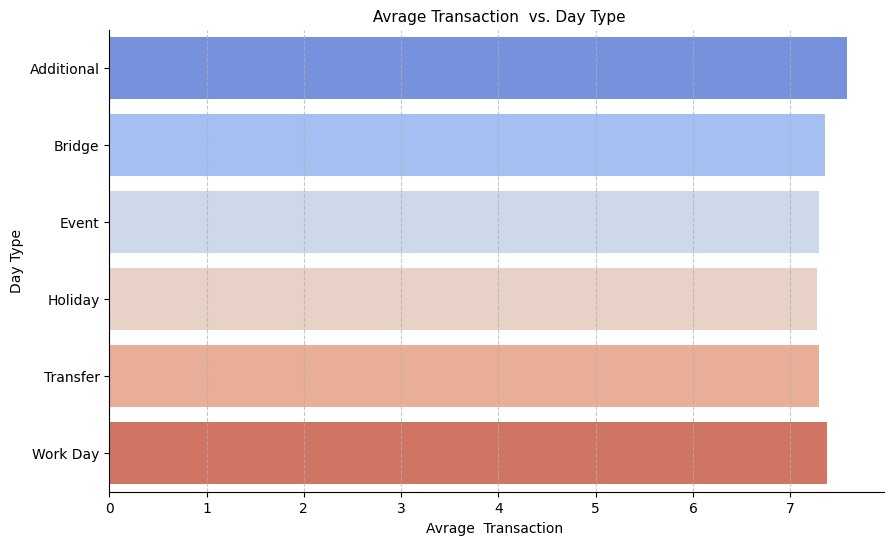

In [ ]:
transactions_with_day_type=HolidayEvents_merged_with_Transactions.groupby('type')['transactions'].mean().reset_index()
print(transactions_with_day_type)


plt.figure(figsize=(10,6))
sns.barplot(y='type', x='transactions',data=transactions_with_day_type, palette="coolwarm")

# Labels & Title
plt.ylabel('Day Type', color='black')
plt.xlabel('Avrage  Transaction ', color='black')
plt.title(' Avrage Transaction  vs. Day Type', fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


C:\Users\Nada\AppData\Local\Temp\ipykernel_11604\3204415813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='locale', x='transactions',data=Transactions_with_locale, palette="coolwarm")


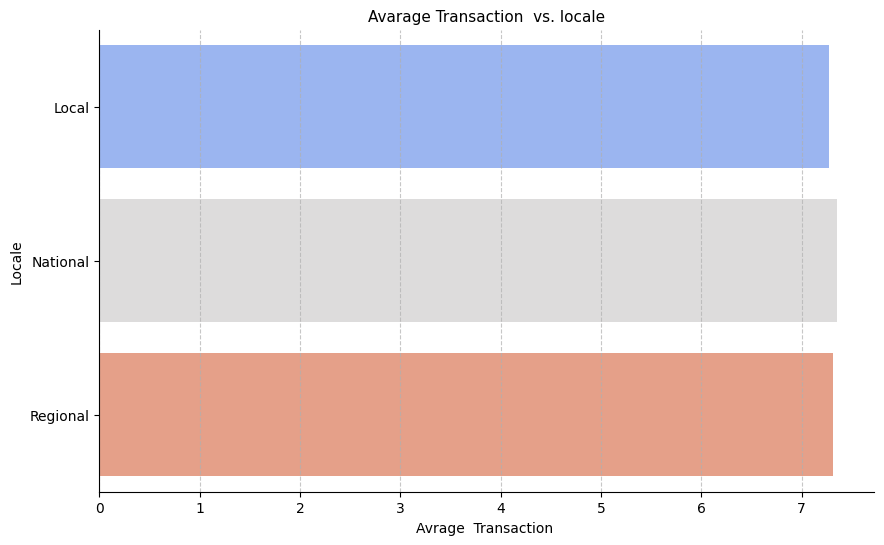

In [ ]:
Transactions_with_locale=HolidayEvents_merged_with_Transactions.groupby('locale')['transactions'].mean().reset_index()
Transactions_with_locale
plt.figure(figsize=(10,6))
sns.barplot(y='locale', x='transactions',data=Transactions_with_locale, palette="coolwarm")

# Labels & Title
plt.ylabel('Locale', color='black')
plt.xlabel('Avrage  Transaction ', color='black')
plt.title('Avarage Transaction  vs. locale', fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()



In [ ]:
transactions_merged_with_Stores=transactions.merge(stores,on='store_nbr',how='inner')
transactions_merged_with_Stores

,date,store_nbr,transactions,avg_transaction_per_store,year,month,day,city,state,type,cluster
0,2015-01-01,25,7.697575,6.809129,2015,1,1,Salinas,Santa Elena,D,1
1,2015-01-02,1,6.929517,7.235730,2015,1,2,Quito,Pichincha,D,13
2,2015-01-02,2,7.528332,7.547012,2015,1,2,Quito,Pichincha,D,13
3,2015-01-02,3,8.140316,8.068792,2015,1,2,Quito,Pichincha,D,8
4,2015-01-02,4,7.327781,7.288880,2015,1,2,Quito,Pichincha,D,9
...,...,...,...,...,...,...,...,...,...,...,...
49437,2017-08-15,50,7.939159,7.831538,2017,8,15,Ambato,Tungurahua,A,14
49438,2017-08-15,51,7.361375,7.418509,2017,8,15,Guayaquil,Guayas,A,17
49439,2017-08-15,52,7.721349,7.731478,2017,8,15,Manta,Manabi,A,11
49440,2017-08-15,53,6.838405,6.918979,2017,8,15,Manta,Manabi,D,13


             city  year  avg_transaction_per_store
0          Ambato  2015                5354.843924
1          Ambato  2016                5340.092288
2          Ambato  2017                3333.869771
3        Babahoyo  2015                2627.260575
4        Babahoyo  2016                2627.260575
..            ...   ...                        ...
61        Salinas  2016                2022.311221
62        Salinas  2017                1545.672213
63  Santo Domingo  2015                6144.466528
64  Santo Domingo  2016                7542.867177
65  Santo Domingo  2017                4709.082823

[66 rows x 3 columns]


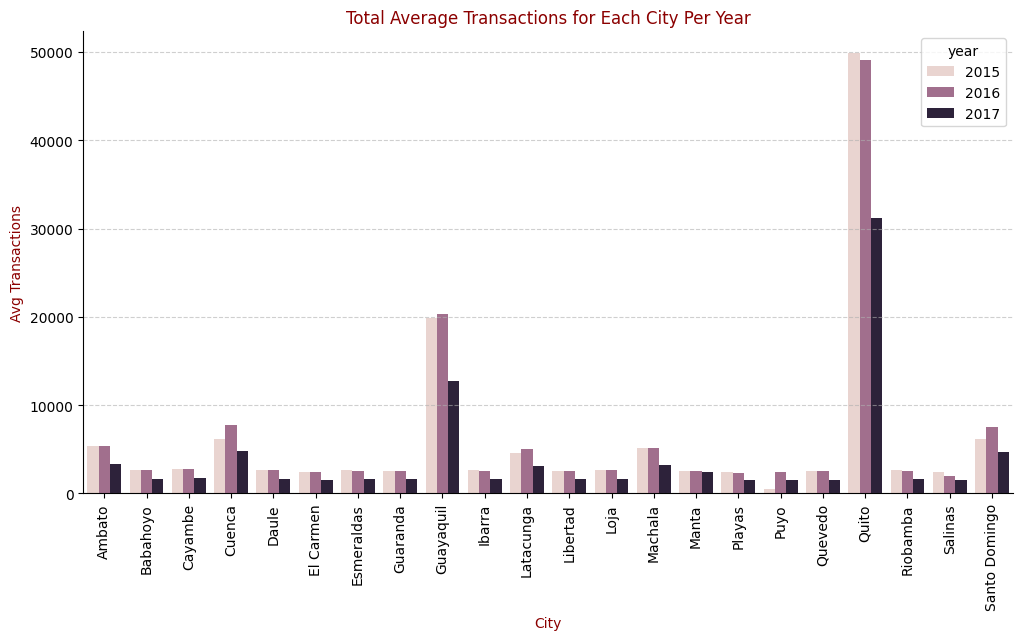

In [ ]:
# Avg transaction for each city from 2015-->2017
tolal_avarage_transactions_for_each_city_per_year = (
    transactions_merged_with_Stores
    .groupby(['city', 'year'])['avg_transaction_per_store']
    .sum()
    .reset_index()
)

print(tolal_avarage_transactions_for_each_city_per_year)


plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='avg_transaction_per_store', hue='year', data=tolal_avarage_transactions_for_each_city_per_year)

# Customize labels and title
plt.ylabel("Avg Transactions", color='darkred')
plt.xlabel("City", color='darkred')
plt.title("Total Average Transactions for Each City Per Year", color='darkred')

plt.xticks(rotation=90)
# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
# Display the plot
plt.show()


                             state  transactions
12                       Pichincha         17903
6                           Guayas         10389
14  Santo Domingo de los Tsachilas          2650
0                            Azuay          2624
10                          Manabi          2020
9                         Los Rios          1904
4                           El Oro          1902
15                      Tungurahua          1902
3                         Cotopaxi          1840
8                             Loja           952


C:\Users\Nada\AppData\Local\Temp\ipykernel_11604\153570461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_states['state'], y=top10_states['transactions'], palette='Reds_r')


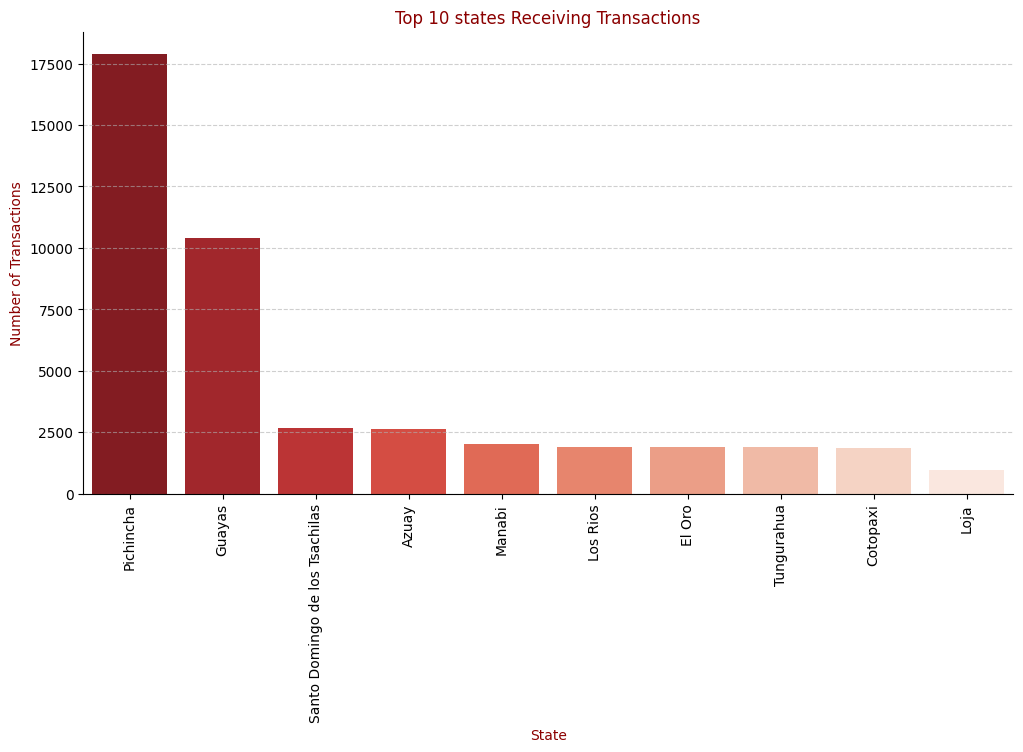

In [ ]:
Avrg_transaction_per_States = transactions_merged_with_Stores.groupby('state')['transactions'].count().reset_index()

# Sort states in descending order based on Avarge transactions and select the top 10
top10_states = Avrg_transaction_per_States.sort_values(by='transactions', ascending=False).head(10)
print(top10_states)
# Create a bar plot to visualize the top 10 cities receiving transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_states['state'], y=top10_states['transactions'], palette='Reds_r')

# Customize labels and title
plt.ylabel("Number of Transactions", color='darkred')  # Label for the x-axis
plt.xlabel("State", color='darkred')  # Label for the y-axis
plt.title("Top 10 states Receiving Transactions", color='darkred')  # Plot title
plt.xticks(rotation=90)
# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
# Display the plot
plt.show()

                             state  transactions
12                       Pichincha         17903
6                           Guayas         10389
14  Santo Domingo de los Tsachilas          2650
0                            Azuay          2624
10                          Manabi          2020
9                         Los Rios          1904
4                           El Oro          1902
15                      Tungurahua          1902
3                         Cotopaxi          1840
8                             Loja           952


C:\Users\Nada\AppData\Local\Temp\ipykernel_11604\1465004108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cities['city'], y=top10_cities['transactions'], palette='Blues')


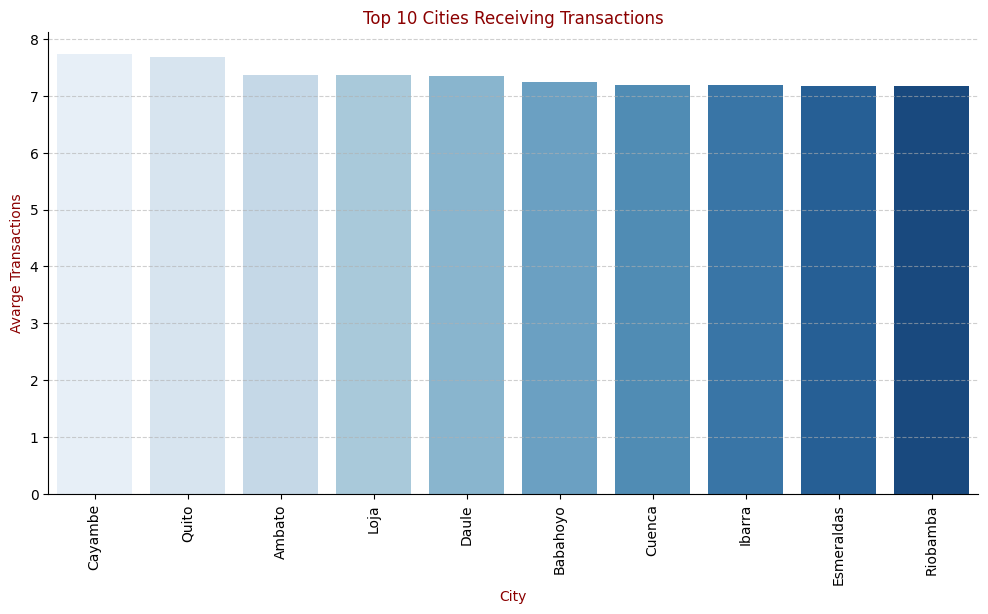

In [ ]:
Avrg_transaction_per_city = transactions_merged_with_Stores.groupby('city')['transactions'].mean().reset_index()

# Sort states in descending order based on Avarge transactions and select the top 10
top10_cities = Avrg_transaction_per_city.sort_values(by='transactions', ascending=False).head(10)
print(top10_states)
# Create a bar plot to visualize the top 10 cities receiving transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_cities['city'], y=top10_cities['transactions'], palette='Blues')

# Customize labels and title
plt.ylabel("Avarge Transactions", color='darkred')  # Label for the x-axis
plt.xlabel("City", color='darkred')  # Label for the y-axis
plt.title("Top 10 Cities Receiving Transactions", color='darkred')  # Plot title
plt.xticks(rotation=90)
# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

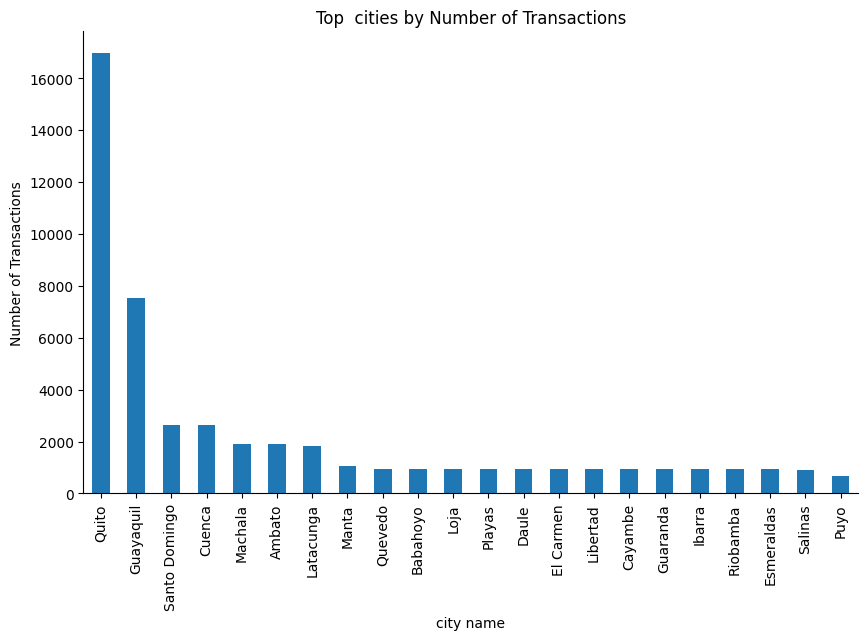

In [ ]:
#top city by number of transactions
No_OF_transaction_per_city=transactions_merged_with_Stores.groupby('city')['transactions'].count().sort_values(ascending=False)
top_cities=No_OF_transaction_per_city
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar')
plt.title('Top  cities by Number of Transactions',color='black')
plt.xlabel('city name',color='black')
plt.ylabel('Number of Transactions',color='black')
plt.xticks(rotation=90)
sns.despine()
plt.show

    store_nbr  transactions
0           1      7.235730
1           2      7.547012
2           3      8.068792
3           4      7.288880
4           5      7.180405
5           6      7.494066
6           7      7.490453
7           8      7.906956
8           9      7.609636
9          10      6.813317
10         11      7.736893
11         12      7.091861
12         13      6.814466
13         14      7.170135
14         15      7.183806
15         16      6.664928
16         17      7.258503
17         18      7.147437
18         19      7.102618
19         20      7.329553
20         21      6.991317
21         22      6.609777
22         23      6.920098
23         24      7.690832
24         25      6.809129
25         26      6.299658
26         27      7.357022
27         28      7.091399
28         29      7.010432
29         30      6.550919
30         31      7.237632
31         32      6.420813
32         33      6.867692
33         34      7.679722
34         35      6

C:\Users\Nada\AppData\Local\Temp\ipykernel_11604\1580214218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(No_of_stores,x='store_nbr',y='transactions',palette='Greens_r')


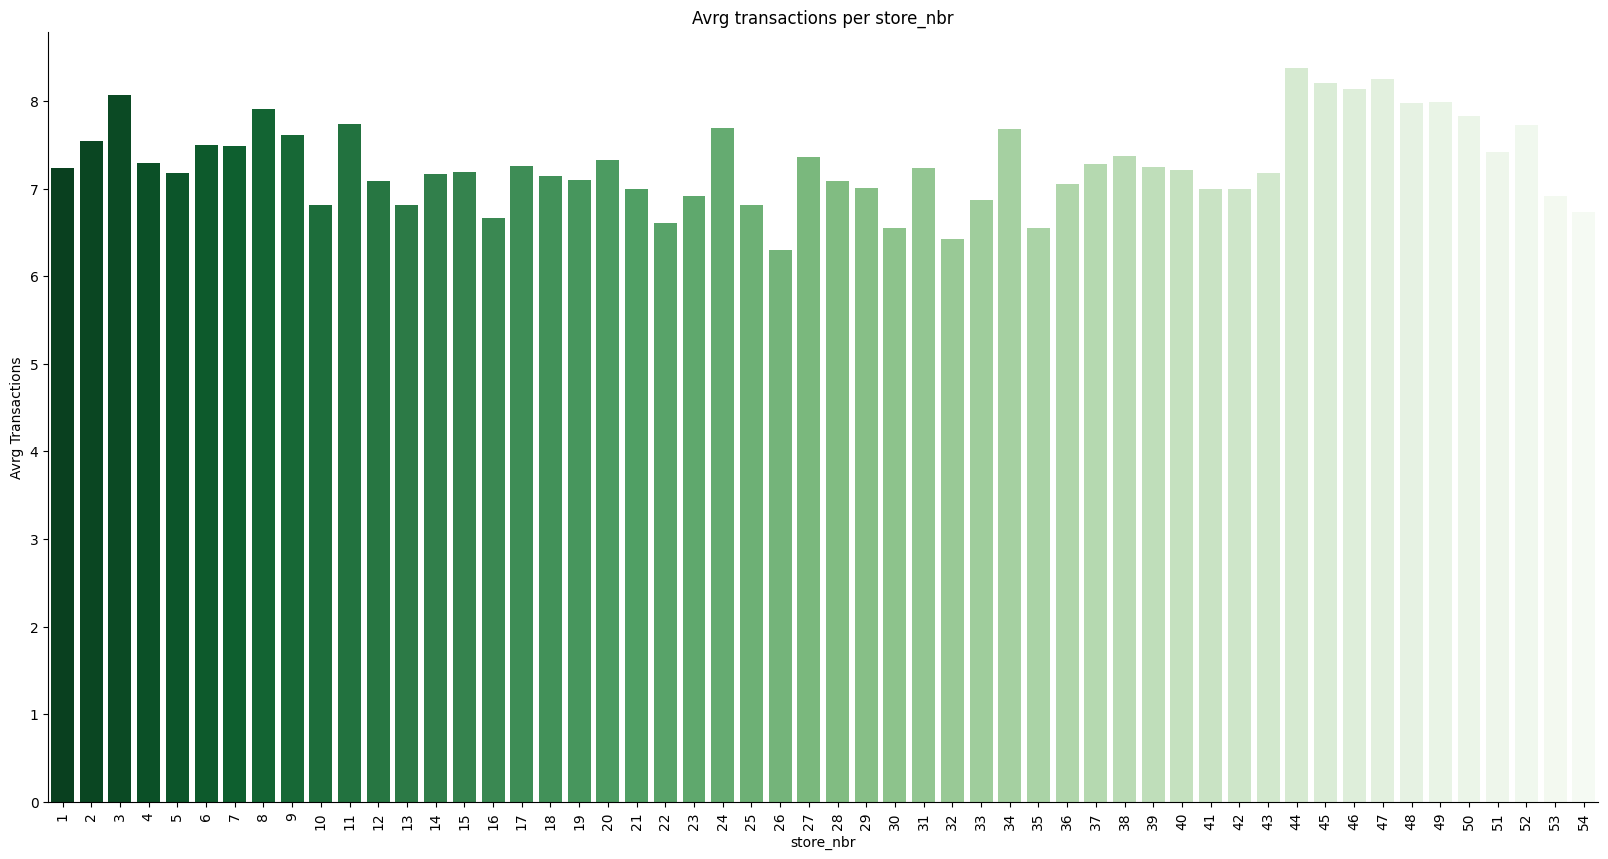

In [ ]:
plt.figure(figsize=(20,10))
No_of_stores=transactions_merged_with_Stores.groupby('store_nbr')['transactions'].mean().reset_index()
print(No_of_stores)
sns.barplot(No_of_stores,x='store_nbr',y='transactions',palette='Greens_r')
plt.title('Avrg transactions per store_nbr')
sns.set_context(rc={"axes.labelsize": 14, "axes.titlesize": 16, "legend.fontsize": 12})
plt.xticks(rotation=90)
plt.ylabel('Avrg Transactions')
sns.despine()
plt.show()

In [ ]:
print(train.dtypes)

date           datetime64[ns]
store_nbr               int16
item_nbr                int32
unit_sales            float32
onpromotion              int8
year                    int32
month                   int32
dtype: object


   year   unit_sales
0  2015  240899904.0
1  2016  288693344.0
2  2017  194242464.0


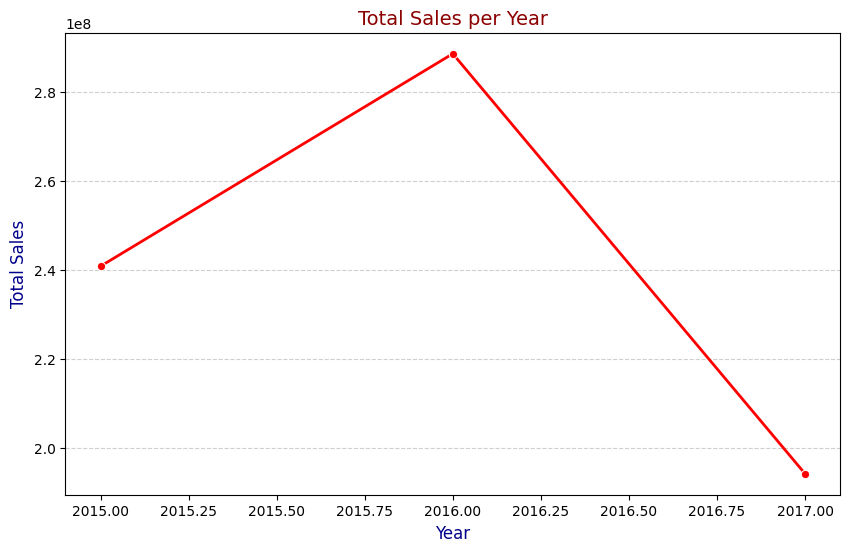

In [ ]:
#total sales per year
total_sales_per_year=train.groupby('year')['unit_sales'].sum().reset_index()
print(total_sales_per_year)

plt.figure(figsize=(10,6))

sns.lineplot(x='year', y='unit_sales', data=total_sales_per_year, marker='o', linewidth=2, color='red')


plt.xlabel("Year", fontsize=12, color='darkblue')
plt.ylabel("Total Sales", fontsize=12, color='darkblue')
plt.title("Total Sales per Year", fontsize=14, color='darkred')

plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

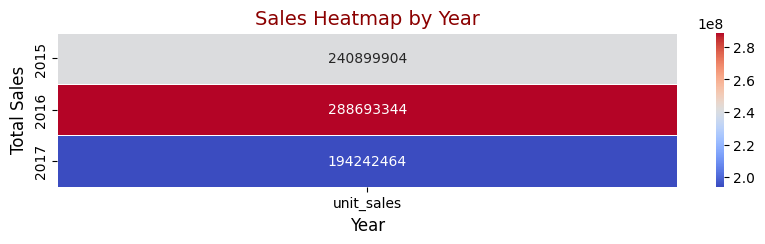

In [ ]:

total_sales_per_year = train.groupby('year')['unit_sales'].sum().reset_index()


heatmap_data = total_sales_per_year.set_index("year")


plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)


plt.title("Sales Heatmap by Year", fontsize=14, color='darkred')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)


plt.show()


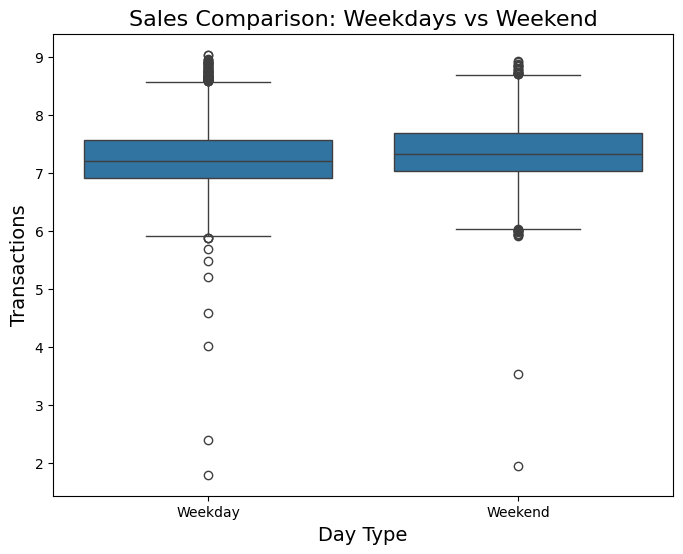

In [ ]:
# Convert the 'date' column to a datetime format to enable date-based operations
transactions['date'] = pd.to_datetime(transactions['date'])
# Extract the day of the week from the 'date' column (0 = Monday, 6 = Sunday)
transactions['day_of_week'] = transactions['date'].dt.dayofweek
# Create a new column 'is_weekend' to indicate whether the day is a weekend (Saturday = 5, Sunday = 6)
transactions['is_weekend'] = transactions['day_of_week'].isin([5, 6])

plt.figure(figsize=(8, 6))
# Create a box plot to compare transaction distributions on weekdays vs weekends
sns.boxplot(x='is_weekend', y='transactions', data=transactions)
# Rename x-axis labels for clarity (0 = Weekday, 1 = Weekend)
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.title('Sales Comparison: Weekdays vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Transactions')
plt.show()

In [ ]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month
0,2015-01-01,25,103665,12.0,0,2015,1
1,2015-01-01,25,105575,23.0,0,2015,1
2,2015-01-01,25,108634,1.0,0,2015,1
3,2015-01-01,25,108698,6.0,0,2015,1
4,2015-01-01,25,108786,6.0,0,2015,1


In [ ]:
items.head()

,item_nbr,family,class,perishable,class_perishable_interaction
0,96995,GROCERY I,1093,0,0
1,99197,GROCERY I,1067,0,0
2,103501,CLEANING,3008,0,0
3,103520,GROCERY I,1028,0,0
4,103665,BREAD/BAKERY,2712,1,2712


In [ ]:
def reduce_memory_usage(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

train = reduce_memory_usage(train)
holiday_events = reduce_memory_usage(items)


In [ ]:
train_merged_with_items=pd.merge(train,items,on='item_nbr',how='inner')
train_merged_with_items

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,family,class,perishable,class_perishable_interaction
0,2015-01-01,25,103665,12.0,0,2015,1,BREAD/BAKERY,2712,1,2712
1,2015-01-01,25,105575,23.0,0,2015,1,GROCERY I,1045,0,0
2,2015-01-01,25,108634,1.0,0,2015,1,GROCERY I,1075,0,0
3,2015-01-01,25,108698,6.0,0,2015,1,DELI,2644,1,2644
4,2015-01-01,25,108786,6.0,0,2015,1,CLEANING,3044,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86897273,2017-08-15,54,2089339,4.0,0,2017,8,GROCERY I,1006,0,0
86897274,2017-08-15,54,2106464,1.0,1,2017,8,BEVERAGES,1148,0,0
86897275,2017-08-15,54,2110456,192.0,0,2017,8,BEVERAGES,1120,0,0
86897276,2017-08-15,54,2113914,198.0,1,2017,8,CLEANING,3040,0,0


In [ ]:
sample_train_items=train_merged_with_items.sample(500000)

In [ ]:
sample_train_items.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,family,class,perishable,class_perishable_interaction
48922638,2016-08-09,31,1473483,10.322,1,2016,8,PRODUCE,2016,1,2016
74737856,2017-04-23,8,1963892,17.000,0,2017,4,GROCERY I,1040,0,0
26223382,2015-12-13,51,1084881,5.000,0,2015,12,GROCERY I,1040,0,0
50283184,2016-08-23,42,1958201,1.000,0,2016,8,BEVERAGES,1142,0,0
20491101,2015-10-12,48,1958216,54.000,0,2015,10,BEVERAGES,1142,0,0


In [ ]:
family_sales_per_year=sample_train_items.groupby(['family','year'])['unit_sales'].sum().reset_index()
print(family_sales_per_year)

                        family  year   unit_sales
0                   AUTOMOTIVE  2015   729.000000
1                   AUTOMOTIVE  2016   729.000000
2                   AUTOMOTIVE  2017   583.000000
3                    BABY CARE  2016    14.000000
4                    BABY CARE  2017    27.000000
..                         ...   ...          ...
92  SCHOOL AND OFFICE SUPPLIES  2016   427.000000
93  SCHOOL AND OFFICE SUPPLIES  2017   876.000000
94                     SEAFOOD  2015  2834.230957
95                     SEAFOOD  2016  3029.892090
96                     SEAFOOD  2017  1629.563965

[97 rows x 3 columns]


       family  year   unit_sales
34  GROCERY I  2015  434733.3750
35  GROCERY I  2016  513290.4375
36  GROCERY I  2017  337439.5625


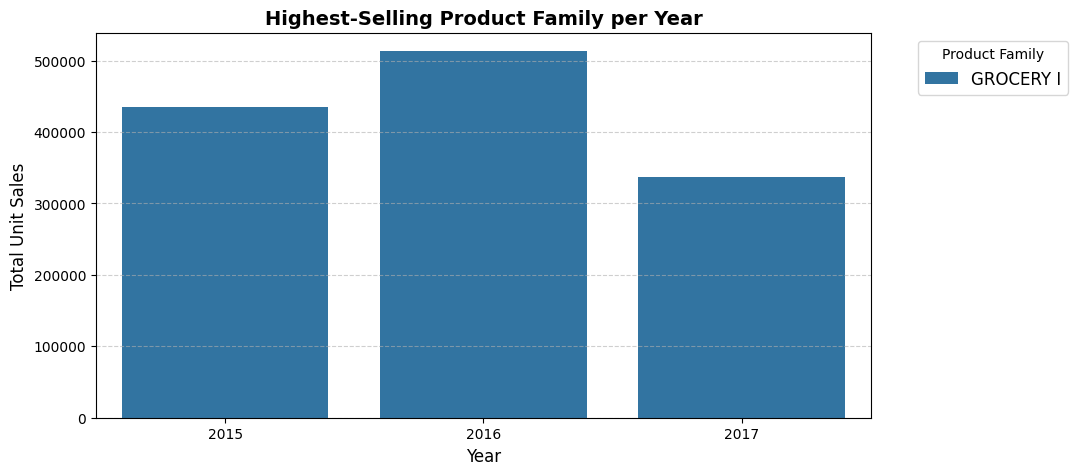

In [ ]:
top_family_per_year = family_sales_per_year.loc[family_sales_per_year.groupby('year')['unit_sales'].idxmax()]

# Display the top families
print(top_family_per_year)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_family_per_year, x="year", y="unit_sales", hue="family", dodge=False)

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Unit Sales", fontsize=12)
plt.title("Highest-Selling Product Family per Year", fontsize=14, fontweight="bold")
plt.legend(title="Product Family", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()